# <b> Laboratório 1

Aluno: Rafael Mendes Campello

Referência: https://ecee.colorado.edu/~mathys/ecen4652/lab01/index.html

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import ModuleLab1
import ModuleLab5
import ModuleLab6
from Resources import comsig
from importlib import reload
from playsound import playsound
reload(ModuleLab1)

<module 'ModuleLab1' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab1/ModuleLab1.py'>

# E1

## a

Plots para Fs: 200, 400, 800, 1600, 3200

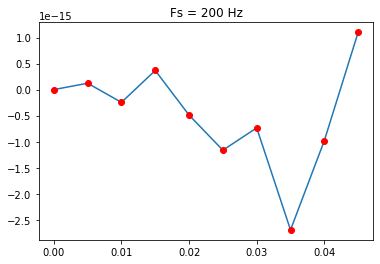

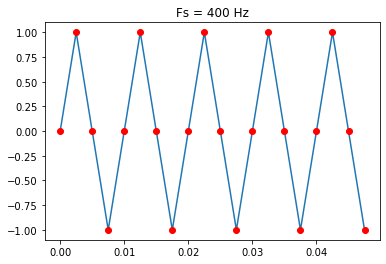

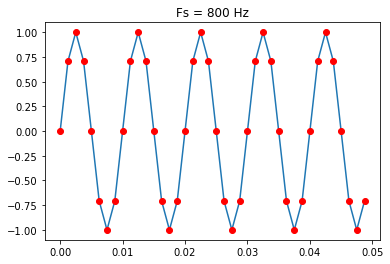

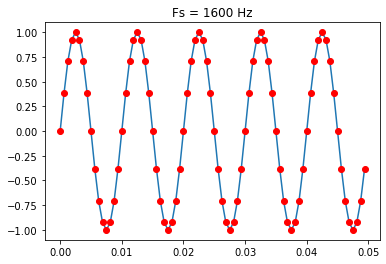

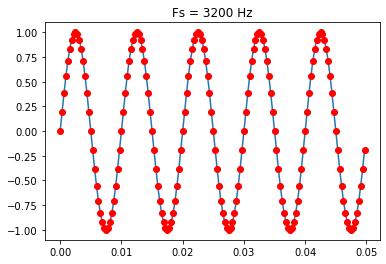

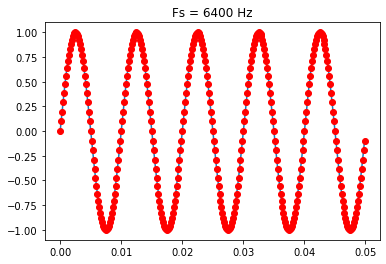

In [2]:
Fs_vector = [200, 400, 800, 1600, 3200, 6400]

for fs in Fs_vector:
    tt, st = ModuleLab1.sine100(Fs = fs)
    plt.title(f"Fs = {fs} Hz")
    plt.plot(tt, st)
    plt.plot(tt, st, color = "red", marker = "o", linestyle = "None")
    plt.show()

A partir de 1600Hz o plot parece razoavelmente próximo da onda contínua. Uma sugestão é usar $F_s \approx 20 f$ ($f$ sendo a maior frequência do sinal) para o gráfico parecer "agradável".

## b

In [3]:
np.sign(0.1), np.sign(0), np.sign(-0.1)

(1.0, 0, -1.0)

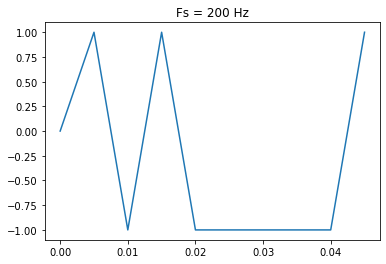

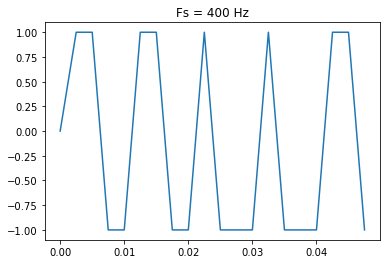

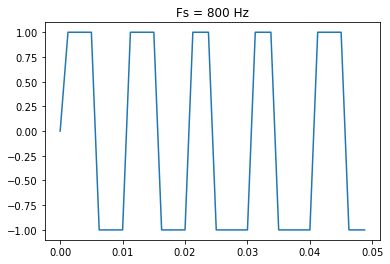

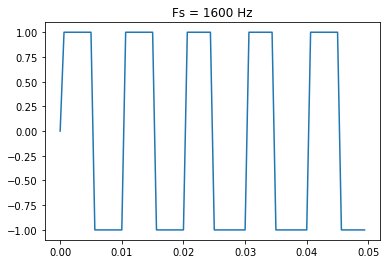

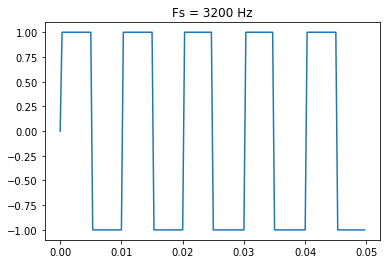

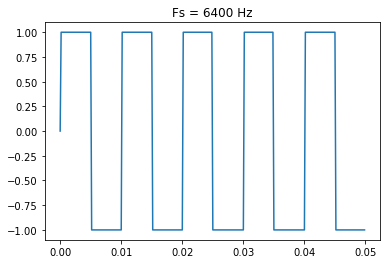

In [4]:
Fs_vector = [200, 400, 800, 1600, 3200, 6400]

for fs in Fs_vector:
    tt, st = ModuleLab1.sine100(Fs = fs)
    rst = np.sign(st)
    plt.title(f"Fs = {fs} Hz")
    plt.plot(tt, rst)
    plt.show()

Para esta situação é preciso tomar cuidado e utilizar uma frequência de amostragem $F_s$ maior (neste caso $F_s >3kHz$), pois ao tornar a onda retangular, surgem componentes de frequências mais altas no sinal.

## c

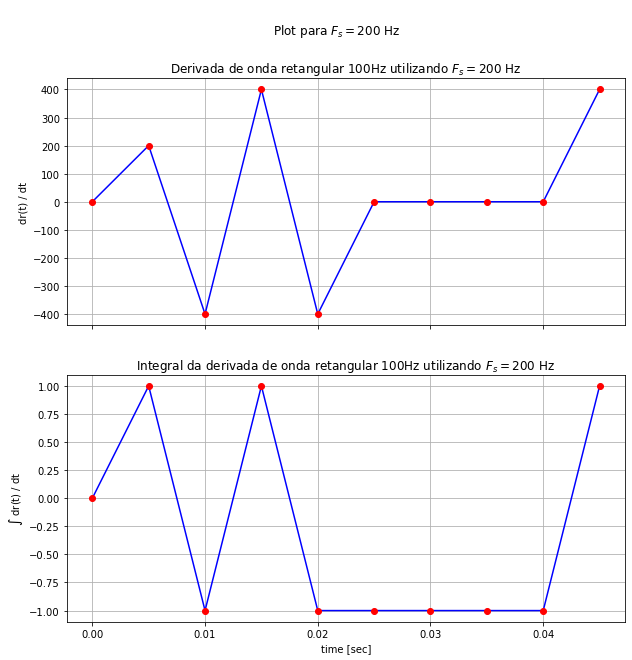

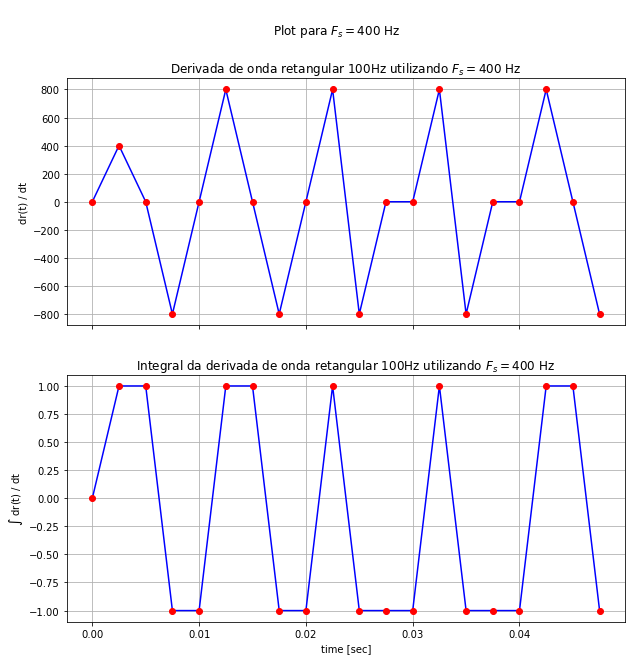

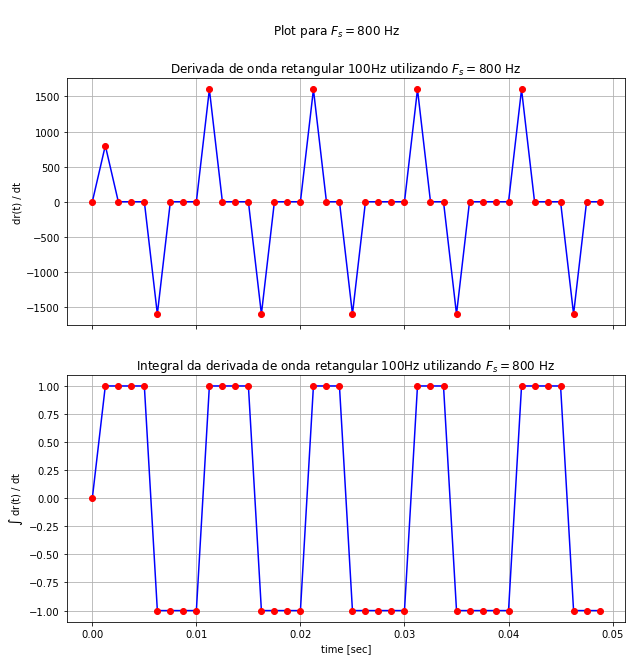

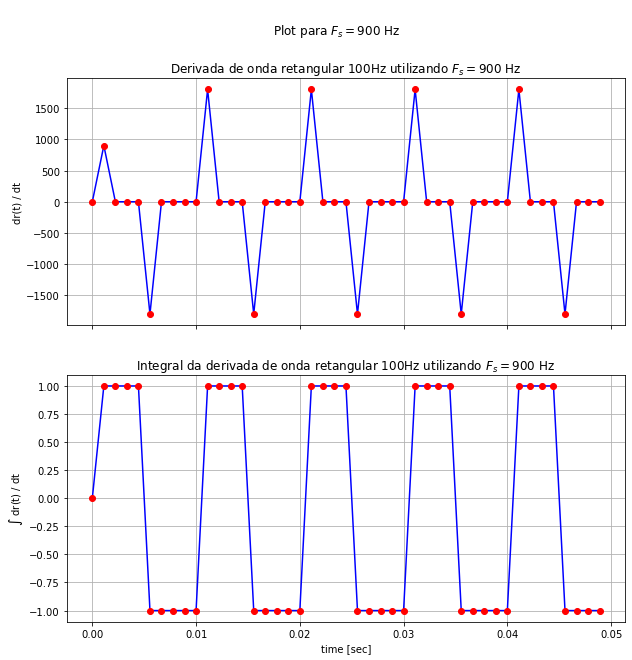

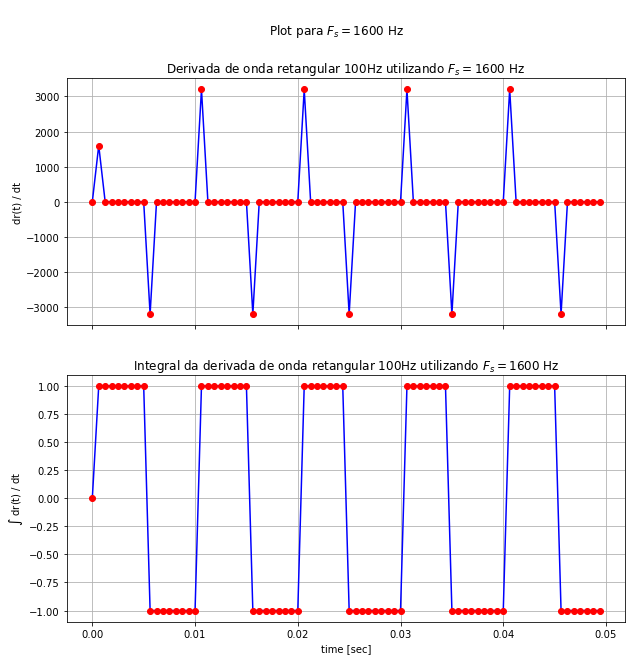

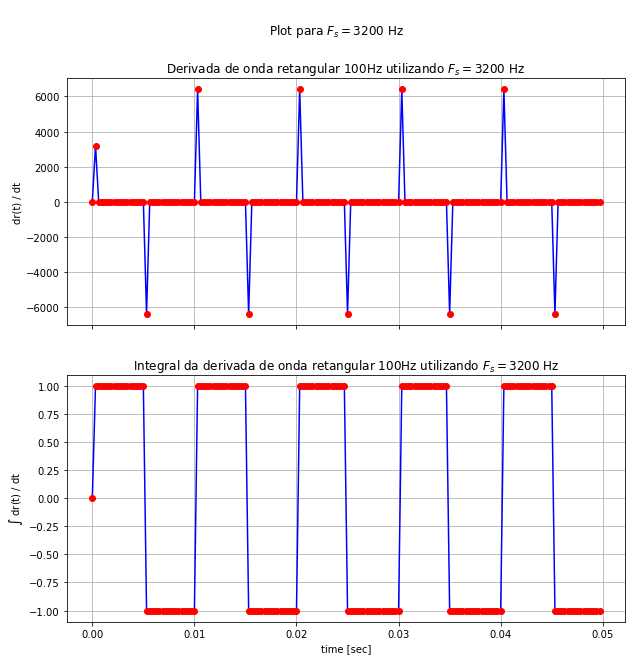

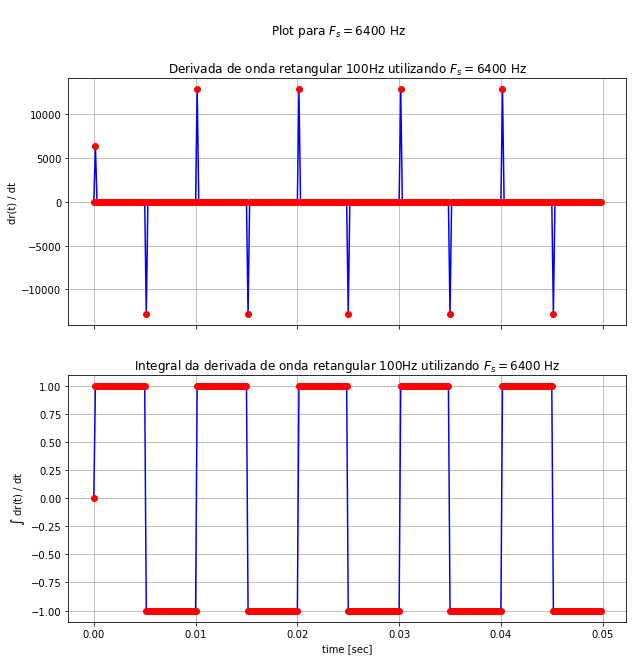

In [5]:
Fs_vector = [200, 400, 800, 900, 1600, 3200, 6400]
# Fs_vector = [900]

for fs in Fs_vector:
    tt, st = ModuleLab1.sine100(Fs = fs)
    rt = np.sign(st)
    
    # faz o mesmo que o sugerido
    rdt = np.diff(rt, prepend = 0) * fs
    rdit = np.cumsum(rdt) / fs
    
    fig, axs = plt.subplots(2, 1, sharex='col', figsize=(10, 10))
    fig.suptitle(f"\nPlot para $F_s = {fs}$ Hz")
    
    axs[0].set_ylabel(f"dr(t) / dt")
    axs[0].set_title(f"Derivada de onda retangular 100Hz utilizando $F_s = {fs}$ Hz")
    axs[0].plot(tt, rdt, color = "blue")
    axs[0].plot(tt, rdt, marker = "o", color = "red", linestyle = "None")
    axs[0].grid()
    
    axs[1].set_ylabel(f"$\int$ dr(t) / dt")
    axs[1].set_title(f"Integral da derivada de onda retangular 100Hz utilizando $F_s = {fs}$ Hz")
    axs[1].plot(tt, rdit, color = "blue")
    axs[1].plot(tt, rdit, marker = "o", color = "red", linestyle = "None")
    axs[1].grid()
    axs[1].set_xlabel("time [sec]")

Da mesma forma que no item b, o sinal parece suficientemente bem reconstruído para $F_s > 3$ kHz. Podemos ver a derivada do sinal contendo "impulsos" nos momentos das transições (mesmo para valores próximos de $F_s \approx 1$ kHz).

## d

In [6]:
Fs, rt = ModuleLab1.wavread("Files/sig01.wav")

In [7]:
Fs

3000

In [8]:
rt.shape

(60,)

Inicialmente, vemos pela documentação da função wavread que o seu primeiro parâmetro é Fs, que nos é dado como sendo 3000, por meio do vetor rt sabemos ter 60 amostras, logo podemos obter o vetor "tt" tempo:

In [9]:
tt = np.arange(rt.size) / Fs

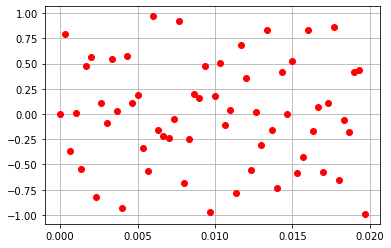

In [10]:
plt.plot(tt, rt, marker = "o", color = "red", linestyle = "None")
plt.xticks(np.arange(5) / 200)
plt.grid()

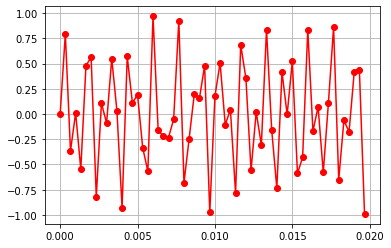

In [11]:
plt.plot(tt, rt, marker = "o", color = "red")
plt.xticks(np.arange(5) / 200)
plt.grid()

Com o plot acima podemos ver que o sinal não parece "suave", podemos interpolar o sinal de maneira análoga ao que foi feita durante as instruções para obter uma versão mais agradável do sinal (assumindo que o sinal é $\textit{baseband}$).

Podemos escolher o fator de upsample, iremos aumentar este valor até ter um gráfico adequado. Os parâmetros do filtro interpolador são escolhidos como k = 10 (fator de truncamento, mesmo utilizado no material). O fator de fL idealmente seria escolhido com o conhecimento a respeito do sinal, como não temos, podemos assumir que o sinal foi amostrado com um $F_s$ adequado ($> 2 f_m$ for sinal original) e escolher o fL de acordo com a aplicação da DFT (e checar qual a frequência máxima no sinal).

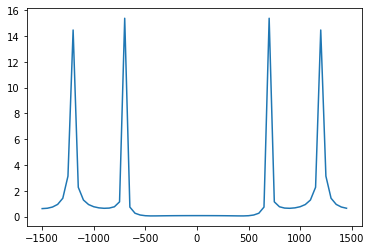

In [12]:
freq = np.fft.fftfreq(rt.size, d = 1 / Fs)
freq = np.fft.fftshift(freq)
plt.plot(freq, np.fft.fftshift(np.abs(np.fft.fft(rt))))

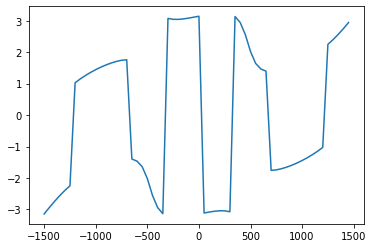

In [13]:
plt.plot(freq, np.angle(np.fft.fftshift(np.fft.fft(rt))))

O sinal parece ser essencialmente a sobreposição de 2 senoides (filtradas). Escolhemos fL = 1500Hz (pois de acordo com a DFT acima freq. máxima parece ser próxima a Fs / 2).

De acordo com a implementação da função "sinc_ipol" fornecida, o valor de fL é diretamente relacionado ao Fs fornecido para a função. Utilizamos a convenção desta implementação, diferentemente da forma como é geralmente tratada nos livros de Processamento de Sinais (ex: Oppenheim), em que consideramos o espectro da versão "upsampled" já escalado pelo fator de upsample "L" (por isso o fL utilizado é 1500 - valor tendo como base o espectro original).

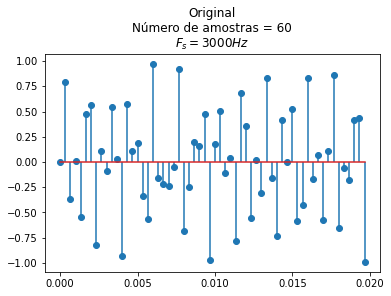

********************************************************************************


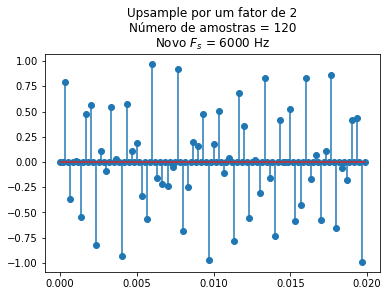

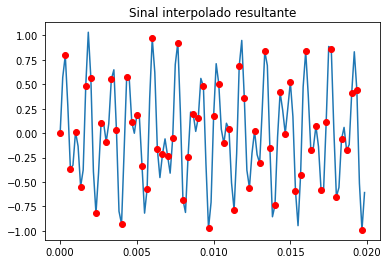

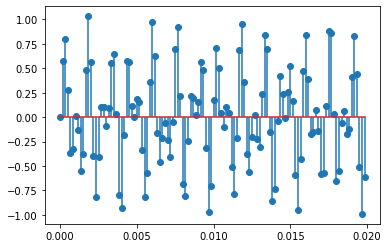

********************************************************************************


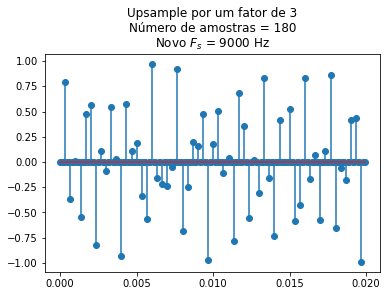

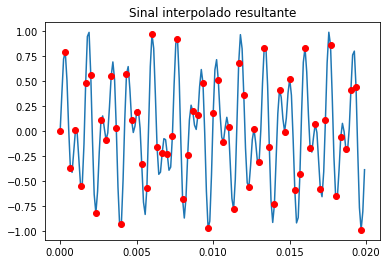

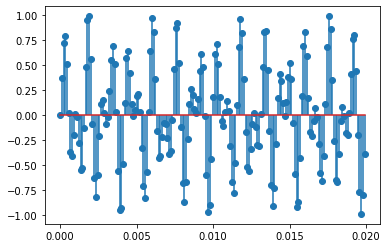

********************************************************************************


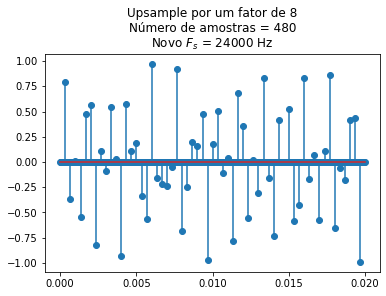

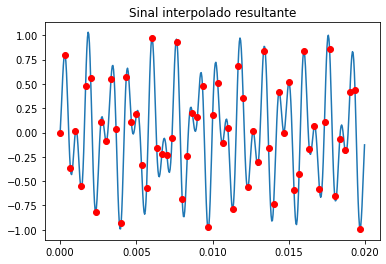

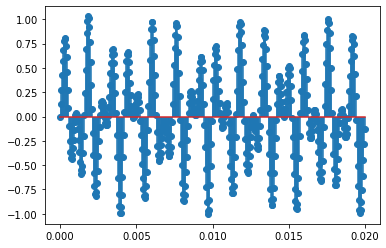

********************************************************************************


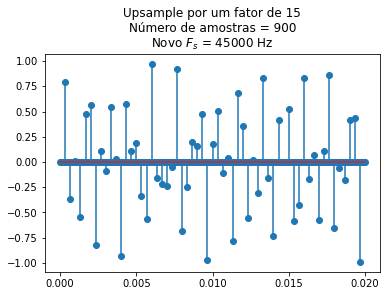

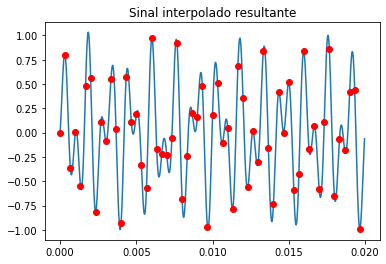

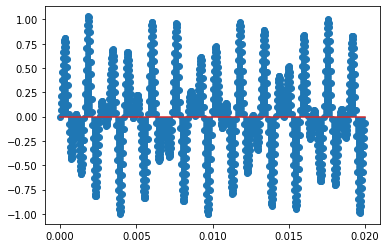

********************************************************************************


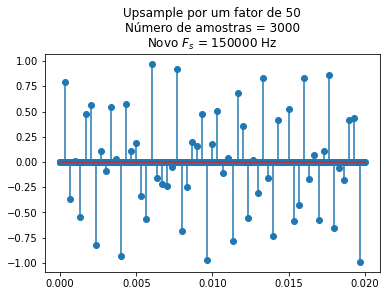

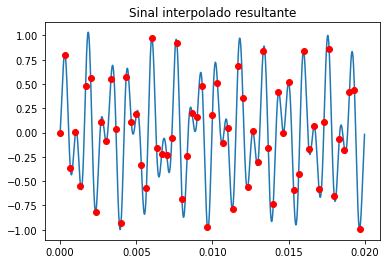

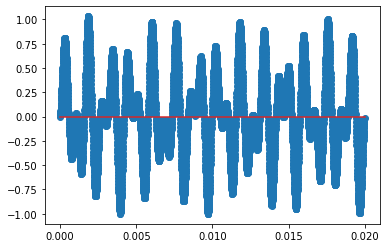

********************************************************************************


In [14]:
plt.title(f"Original\nNúmero de amostras = {tt.size}\n$F_s = {Fs} Hz$")
plt.stem(tt, rt, use_line_collection = True)
plt.xticks(np.arange(5) / 200)
plt.show()
print("*" * 80)

Upsample_vector = [2, 3, 8, 15, 50]

for upsample_factor in Upsample_vector:
    my_xNt = np.zeros(shape = (rt.size * upsample_factor, ), dtype = np.float64)
    my_xNt[::upsample_factor] = rt
    
    FsN = Fs * upsample_factor
    ttN = np.arange(my_xNt.size) / FsN
    
    plt.title(f"Upsample por um fator de {upsample_factor}\nNúmero de amostras = {ttN.size}\nNovo $F_s$ = {FsN} Hz")
    plt.stem(ttN, my_xNt, use_line_collection = True)
    plt.xticks(np.arange(5) / 200)
    plt.show()
    
    fL = int(1.5e3)
    k = 10
    tth, ht = ModuleLab1.sinc_ipol(FsN, fL, k)
#     plt.plot(ht / Fs)
#     plt.show()
    yNt = np.convolve(my_xNt, ht / Fs, 'same')
    
    
    plt.title("Sinal interpolado resultante")
    plt.plot(ttN, yNt)
    plt.plot(tt, rt, marker = "o", color = "red", linestyle = "None")
    plt.xticks(np.arange(5) / 200)
    plt.show()
    
    plt.stem(ttN, yNt, use_line_collection = True)
    plt.xticks(np.arange(5) / 200)
    plt.show()
    print("*" * 80)

Escolhemos um fator de upsample de 8 e fL = 1.5kHz

Novo Fs: 24000
(480,)


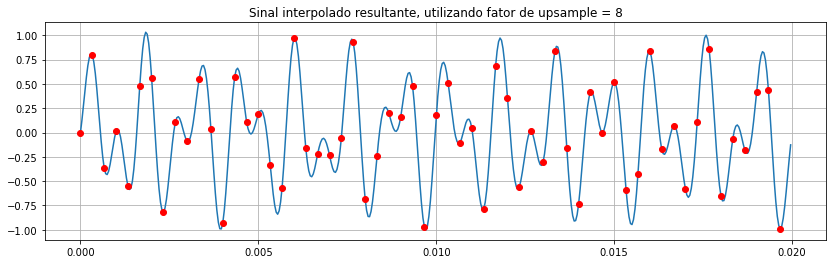

In [15]:
upsample_factor = 8
my_xNt = np.zeros(shape = (rt.size * upsample_factor, ), dtype = np.float64)
my_xNt[::upsample_factor] = rt

FsN = Fs * upsample_factor
ttN = np.arange(my_xNt.size) / FsN
print(f"Novo Fs: {FsN}")
fL = int(1.5e3)
k = 10
tth, ht = ModuleLab1.sinc_ipol(FsN, fL, k)
yNt = np.convolve(my_xNt, ht / Fs, 'same')
print(my_xNt.shape)

plt.figure(figsize = (14, 4))
plt.title(f"Sinal interpolado resultante, utilizando fator de upsample = {upsample_factor}")
plt.plot(ttN, yNt)
plt.plot(tt, rt, marker = "o", color = "red", linestyle = "None")
plt.xticks(np.arange(5) / 200)
plt.grid()
plt.show()

# E2

In [16]:
reload(ModuleLab1)

<module 'ModuleLab1' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab1/ModuleLab1.py'>

## a

Verificando com o exemplo indicado da string "Test":

In [17]:
tt, st = ModuleLab1.ftpam01("Test", 100, 44100)

In [18]:
# para o plot dos instantes de amostragem podemos usar 441 (pois 441 é divísivel por 100), para outros casos
# a função ftpam_rcv01 escolhe os instantes de tempo ajustados
half_time = list(range(441 // 2, st.size, 441))

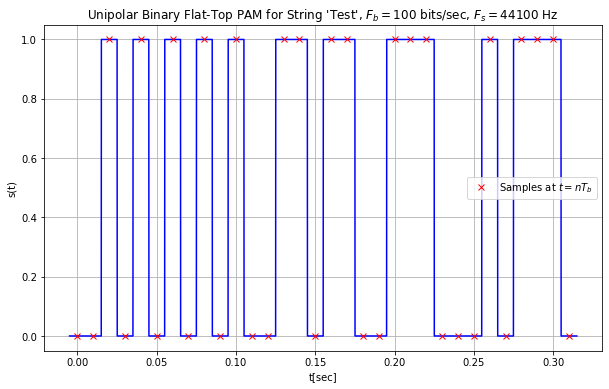

In [19]:
plt.figure(figsize=(10, 6))
plt.title("Unipolar Binary Flat-Top PAM for String 'Test', $F_b = 100$ bits/sec, $F_s = 44100$ Hz")
plt.xlabel("t[sec]")
plt.ylabel("s(t)")
plt.plot(tt, st, color = "blue")
plt.plot(tt[half_time], st[half_time], color = "red", marker = "x", linestyle = "None", label = "Samples at $t = n T_b$")
plt.grid()
plt.legend()

In [20]:
Fs = 44100
Fb = 100
tt, st = ModuleLab1.ftpam01("MyTest", Fb, Fs)
ModuleLab1.wavwrite("MyTest.wav", Fs, 0.99 * st / float(max(abs(st))))

## b

Testando para arquivo anterior "MyTest"

In [21]:
Fs, rt = ModuleLab1.wavread("MyTest.wav")
Fb = 100
ttr = np.arange(rt.size) / Fs - 1 / (2 * Fb)

Fbparms = [Fb, 0]
rn, ixn = ModuleLab1.ftpam_rcvr01(ttr, rt, Fbparms)

In [22]:
dh = np.round(rn).astype(np.int8)

In [23]:
dnhat = ModuleLab1.bin2asc(np.round(rn).astype(int), flg = 0)

In [24]:
dnhat

'MyTest'

Fazendo o mesmo para o arquivo indicado "ftpam_sig01.wav"

In [25]:
Fs, rt = ModuleLab1.wavread("Files/ftpam_sig01.wav")
Fb = 100
ttr = np.arange(rt.size) / Fs - 1 / (2 * Fb)

Fbparms = [Fb, 0]
rn, ixn = ModuleLab1.ftpam_rcvr01(ttr, rt, Fbparms)

(80,)


<StemContainer object of 3 artists>

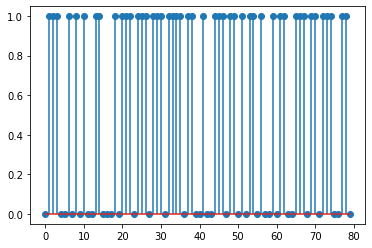

In [26]:
print(rn.shape)
plt.stem(rn, use_line_collection=True)

In [27]:
dh = np.round(rn).astype(np.int8)

In [28]:
dnhat = ModuleLab1.bin2asc(dh, flg = 0)
print(dnhat)

Networking


In [29]:
ModuleLab1.wav2txt("MyTest.wav", Fb = 100)

'MyTest'

In [30]:
ModuleLab1.wav2txt("Files/ftpam_sig01.wav", Fb = 100)

'Networking'

## c

In [31]:
Fs, rt = ModuleLab1.wavread("Files/ftpam_sig02.wav")

Uma possibilidade é testar valores diferentes de $F_b$ e checar se o texto resultante é plausível, por exemplo, checando que todos os caracteres estão no intervalo [32, 122] na tabela ASCII. Outras estratégias também são possíveis, como por exemplo ver qual o menos intervalo entre a variação de duas amostras consecutivas.

De forma geral, é muito importante conhecer o $F_b$ pois em sistemas mais complexos, com ruído, estratégias como as citadas acima funcionarão com probabilidade bem mais baixa, além de serem custosas.

In [32]:
ModuleLab1.wav2txt("Files/ftpam_sig02.wav", Fb = 300)

'Who is Tuna "Phish"?'

In [33]:
Fb = 0
while True:
    Fb += 1
    try:
        txt = ModuleLab1.wav2txt("Files/ftpam_sig02.wav", Fb = Fb)
#         print(Fb)
        if ModuleLab1.check_sensible_string(txt):
            print(txt, Fb)
#             break
    except:
        pass
    if Fb >= 500:
        break

Who is Tuna "Phish"? 300


No caso em questão, $F_b = 300$ Hz decodifica a mensagem.

Fazendo agora para o arquivo "ftpam_sig03.wav"

In [34]:
Fs, rt = ModuleLab1.wavread("Files/ftpam_sig03.wav")

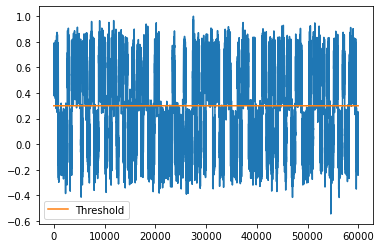

In [35]:
plt.plot(rt)
plt.plot(np.arange(rt.size), np.ones(shape=(rt.size,)) * 0.3, label = "Threshold")
plt.legend()

Novamente, podemos testar valores de threshold até obter uma string plausível, do plot acima vemos que claramente o valor de threshold adequado parece ser em torno de 0.3

In [36]:
Th = -0.5
while True:
    Th += 0.01
    try:
        txt = ModuleLab1.wav2txt_Th("Files/ftpam_sig03.wav", Fb = 100, Th = Th)
        if ModuleLab1.check_sensible_string(txt):
            print(txt, Th)
#             break
    except:
        pass
    if Th >= 1:
        break

Cosmic Dustbuster 0.2600000000000004
Cosmic Dustbuster 0.2700000000000004
Cosmic Dustbuster 0.2800000000000004
Cosmic Dustbuster 0.2900000000000004
Cosmic Dustbuster 0.30000000000000043
Cosmic Dustbuster 0.31000000000000044
Cosmic Dustbuster 0.32000000000000045
Cosiic Dustbuster 0.33000000000000046
Cosiic Dustbuster 0.34000000000000047
Cosiic Dustbuster 0.3500000000000005
Cosiic Dustbuster 0.3600000000000005
Cosaic Dustbuster 0.3700000000000005
Cosaic Dustbuster 0.3800000000000005
Cosaic Dustbuster 0.3900000000000005
CosAiC Dustbuster 0.4000000000000005
CosAiC Dustbusper 0.41000000000000053
AosAiC Dustbusper 0.42000000000000054
AosAiC Dustbusper 0.43000000000000055


In [37]:
ModuleLab1.wav2txt_Th("Files/ftpam_sig03.wav", Fb = 100, Th = 0.3)

'Cosmic Dustbuster'

# E3

In [38]:
reload(ModuleLab1)

<module 'ModuleLab1' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab1/ModuleLab1.py'>

## a

In [39]:
Fs = 4000
fm = 100
tlen = 0.015

In [40]:
tt = np.arange(np.round(tlen*Fs))/float(Fs)
xt = np.sin(2*np.pi*fm*tt)

Fazendo a quantização para os números de bits abaixo:

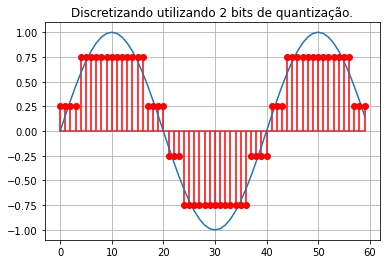

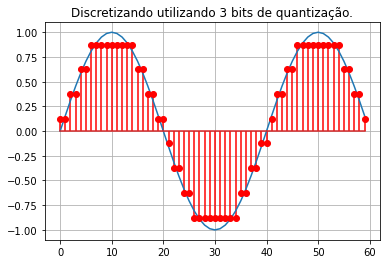

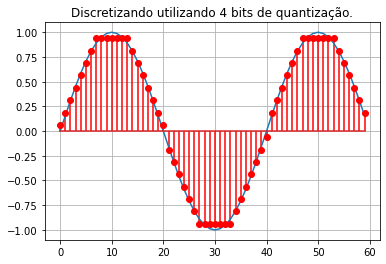

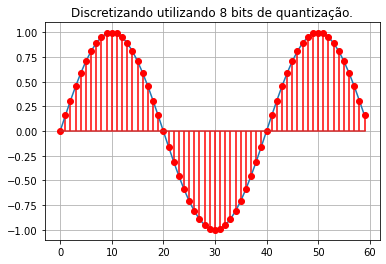

In [41]:
for bits in [2, 3, 4, 8]:
    dn, disc = ModuleLab1.mt2pcm(xt, bits = bits)
    plt.title(f"Discretizando utilizando {bits} bits de quantização.")
    plt.plot(xt)
#     plt.stem(disc, use_line_collection=True, markerfmt = "bo", linefmt = "blue")
    dn_recovered = ModuleLab1.pcm2mt(dn, bits = bits)
    plt.stem(dn_recovered, use_line_collection=True, markerfmt = "ro", linefmt = "red")
#     assert(np.array_equal(dn_recovered, disc))
    plt.grid()
    plt.show()

## b

In [42]:
reload(ModuleLab1)

<module 'ModuleLab1' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab1/ModuleLab1.py'>

Primeiro, usaremos os sinais $\texttt{pcm_test01.wav}$ e $\texttt{pcm_test02.wav}$ para testar as implementações anteriores das funções relevantes, sabendo que a forma de onda se trata de um seno de $f = 233.3 Hz$ e quantização de 3 e 8 bits respectivamente.

O sinal $m(t)$ de ambas os arquivos são os mesmos, e é dito que para o primeiro $F_b = 2400 Hz$, ou seja $F_s = 8000 Hz$ no sinal analógico original, isso também implica que o $F_b$ do segundo arquivo é $F_b = 64000 Hz$.

In [43]:
Fs, rt = ModuleLab1.wavread("Files/pcm_test01.wav")
print(Fs, rt.shape)

512000 (51200,)


In [44]:
Fb = 24000
Tb = 1 / Fb

In [45]:
ttr = np.arange(rt.size) / Fs - 1 / (2 * Fb)

In [46]:
ttr.shape

(51200,)

In [47]:
rn, ixn = ModuleLab1.ftpam_rcvr_th(ttr, rt, [Fb, 0], 0.5)

In [48]:
rn.shape, ixn.shape

((2400,), (2400,))

In [49]:
mt = ModuleLab1.pcm2mt(rn, bits = 3)

In [50]:
mt.shape

(800,)

In [51]:
ttrmt = np.arange(mt.size) / (8000)

<StemContainer object of 3 artists>

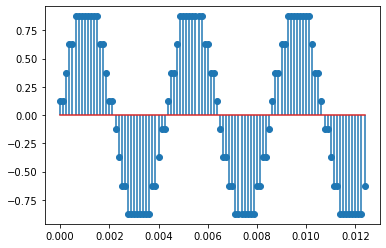

In [52]:
plt.stem(ttrmt[:100], mt[:100], use_line_collection=True)

In [53]:
# qtd de ciclos em 0.012 segundos do plot acima
233.3 * 0.012

2.7996000000000003

Agora, para o segundo sinal de teste

In [54]:
Fs, rt = ModuleLab1.wavread("Files/pcm_test02.wav")
print(Fs, rt.shape)

512000 (51200,)


In [55]:
Fb = 64000

In [56]:
ttr = np.arange(rt.size) / Fs - 1 / (2 * Fb)

In [57]:
rn, ixn = ModuleLab1.ftpam_rcvr_th(ttr, rt, [Fb, 0], 0.5)

In [58]:
rn.shape, ixn.shape

((6400,), (6400,))

In [59]:
mt = ModuleLab1.pcm2mt(rn, bits = 8)

In [60]:
ttrmt = np.arange(mt.size) / (8000)

<StemContainer object of 3 artists>

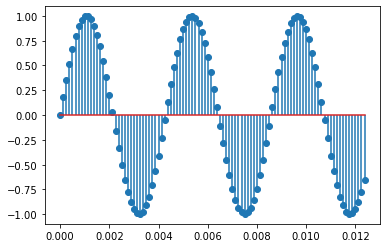

In [61]:
plt.stem(ttrmt[:100], mt[:100], use_line_collection=True)

In [62]:
# qtd de ciclos em 0.012 segundos do plot acima
233.3 * 0.012

2.7996000000000003

Agora o mesmo procedimento para os sinais principais: $\texttt{pcm_sig01.wav}$ e $\texttt{pcm_sig02.wav}$.

Para ambos os sinais utilizamos as funções feitas anteriormente na letra a para realizar as conversões para PCM, e a conversão para Flat-Top PAM utiliza a mesma função da questão E2. Para o caso com ruído devemos utilizar um threshold adequado, que pode ser determinado por exemplo por meio de um histograma (ou testando valores até a percepção auditiva do sinal estar adequada).

Realizamos a recepção do sinal por meio da função do receptor Flat-Top PAM (possivelmente ajustada com um valor de threshold adequado) e depois aplicamos o decodificador PCM para obter o sinal "analógico" $m(t)$.

In [63]:
Fs, rt = ModuleLab1.wavread("Files/pcm_sig01.wav")
print(Fs, rt.shape)

512000 (665600,)


In [64]:
Fb = 64000
Tb = 1 / Fb

In [65]:
ttr = np.arange(rt.size) / Fs - 1 / (2 * Fb)

In [66]:
ttr.shape

(665600,)

<StemContainer object of 3 artists>

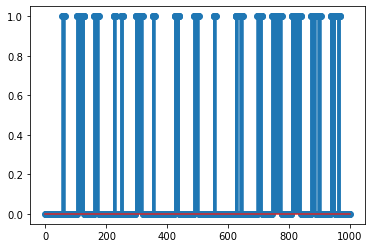

In [67]:
plt.stem(rt[:1000], use_line_collection=True)

(array([459904.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 205696.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

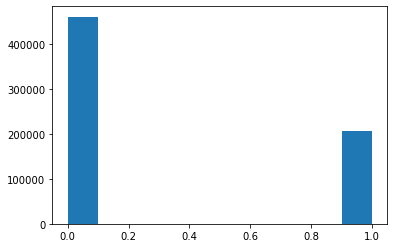

In [68]:
plt.hist(rt)

In [69]:
rn, ixn = ModuleLab1.ftpam_rcvr_th(ttr, rt, [Fb, 0], 0.5)

In [70]:
rn.shape

(83200,)

In [71]:
mt = ModuleLab1.pcm2mt(rn, bits = 8)

In [72]:
mt.shape

(10400,)

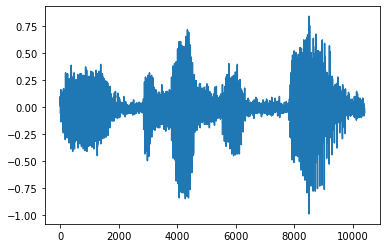

In [73]:
plt.plot(mt)

In [74]:
# Fs original (do sinal m(t)) é 8kHz, pois 64k / 8bits de quantização
ModuleLab1.wavwrite("m(t)_sinal1.wav", int(8e3), mt)

In [76]:
# playsound("m(t)_sinal1.wav")

Agora, podemos reproduzir o arquivo acima normalmente.

Fazendo o mesmo para o segundo sinal (com uso de um threshold específico):

In [77]:
Fs, rt = ModuleLab1.wavread("Files/pcm_sig02.wav")
print(Fs, rt.shape)

512000 (665600,)


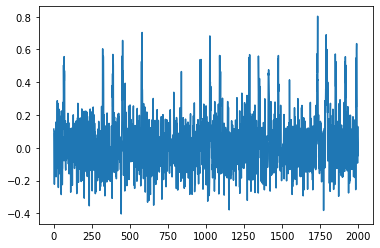

In [78]:
plt.plot(rt[:2000])

(array([2.61000e+02, 9.90500e+03, 9.33560e+04, 2.11029e+05, 1.26316e+05,
        7.79760e+04, 1.01341e+05, 4.12540e+04, 4.07500e+03, 8.70000e+01]),
 array([-0.55885494, -0.40296945, -0.24708395, -0.09119846,  0.06468704,
         0.22057253,  0.37645802,  0.5323435 ,  0.688229  ,  0.8441145 ,
         1.        ], dtype=float32),
 <a list of 10 Patch objects>)

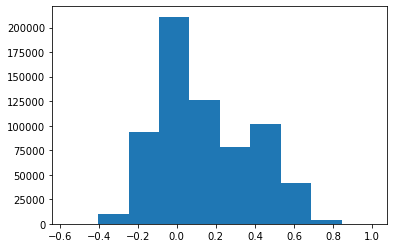

In [79]:
plt.hist(rt)

Um fato interessante nesse sinal com ruído é que a escolha do threshold afeta diretamente a percepção de ruído no sinal analógico resultante. Por exemplo, se escolhermos um valor baixo como 0.0, o sinal parece muito ruidoso, para 0.3 o sinal parece mais limpo, aumentar o valor mais faz com que todo bit seja interpretado como '0', perdendo toda a informação do sinal (nesse caso não há ruído, mas também não há sinal).

In [80]:
TH = 0.3

In [81]:
rn, ixn = ModuleLab1.ftpam_rcvr_th(ttr, rt, [Fb, 0], TH)

In [82]:
mt = ModuleLab1.pcm2mt(rn, bits = 8)

<StemContainer object of 3 artists>

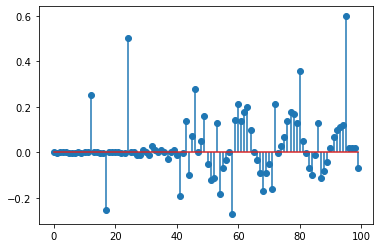

In [83]:
plt.stem(mt[:100], use_line_collection=True)

In [84]:
ModuleLab1.wavwrite(f"m(t)_sinal2_th_{TH}.wav", int(8e3), mt)

In [84]:
# playsound(f"m(t)_sinal2_th_{TH}.wav")

## Voltando depois do Lab6 (Filtros Casados)

Primeiro usamos um "filtro casado feito na mão"

In [283]:
Fs, rt = ModuleLab1.wavread("Files/pcm_sig02.wav")
print(Fs, rt.shape)

512000 (665600,)


In [284]:
sig_bn

FB=64000, n0=0, Nsamp=83200

In [285]:
dec = []
for samp in range(83200):
    mn = np.mean(rt[8 * samp : 8 * (samp + 1)])
    dec.append(mn)
dec = np.array(dec)

In [287]:
dec

array([-0.02542192, -0.01950514,  0.04569766, ..., -0.00964766,
        0.06260872, -0.03761407], dtype=float32)

(array([1.0670e+03, 1.9628e+04, 3.0947e+04, 4.3500e+03, 4.2000e+01,
        1.6000e+01, 1.8960e+03, 1.4500e+04, 1.0173e+04, 5.8100e+02]),
 array([-0.16755043, -0.09117252, -0.0147946 ,  0.06158331,  0.13796122,
         0.21433914,  0.29071707,  0.36709496,  0.4434729 ,  0.5198508 ,
         0.5962287 ], dtype=float32),
 <a list of 10 Patch objects>)

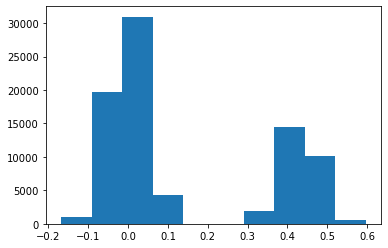

In [286]:
plt.hist(dec)

In [201]:
bits = np.where(dec >= 0.2, 1, 0)

In [202]:
mt = ModuleLab1.pcm2mt(bits, bits = 8)

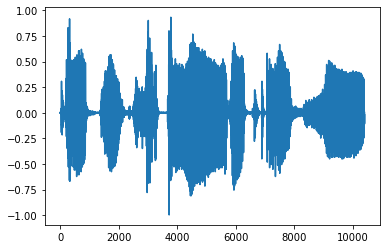

In [203]:
plt.plot(mt)

In [204]:
ModuleLab1.wavwrite(f"mf_hand.wav", int(8e3), mt)

In [288]:
sig_xt = comsig.sigWave(rt, Fs, - 1 / (2 * Fb))

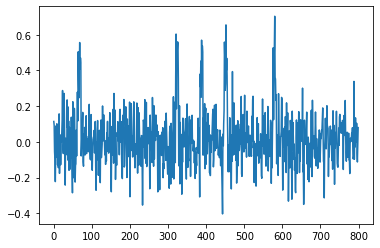

In [289]:
plt.plot(sig_xt.signal()[:800])

In [290]:
reload(ModuleLab6)

<module 'ModuleLab6' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab1/ModuleLab6.py'>

In [291]:
sig_bn, sig_bt, ixn = ModuleLab6.pamrcvr10(sig_xt, [Fb, 0], 'rect', [])
dec2 = sig_bn.signal()

In [292]:
dec2

array([-0.02704321, -0.03264336,  0.0419248 , ...,  0.00121693,
        0.04395047, -0.0301294 ])

(array([  358., 10717., 30836., 13125.,   992.,   170.,  4878., 14482.,
         7116.,   526.]),
 array([-0.17883465, -0.1029355 , -0.02703635,  0.0488628 ,  0.12476196,
         0.20066111,  0.27656026,  0.35245941,  0.42835857,  0.50425772,
         0.58015687]),
 <a list of 10 Patch objects>)

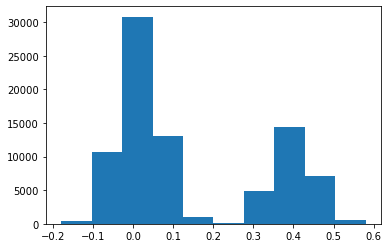

In [293]:
plt.hist(dec2)

In [294]:
bits = np.where(dec2 >= 0.25, 1, 0)

In [295]:
bits

array([0, 0, 0, ..., 0, 0, 0])

In [296]:
mt = ModuleLab1.pcm2mt(bits, bits = 8)

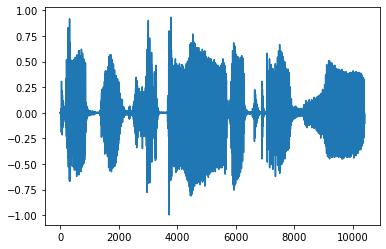

In [297]:
plt.plot(mt)

In [298]:
ModuleLab1.wavwrite(f"mf.wav", int(8e3), mt)